### King County - start urban farming club 

#### close to city and affordable houses with large lots

In [196]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white')

### background check on the region to pick the citys of intrest

In [197]:
us_cities = pd.read_csv('data/uscities.csv')

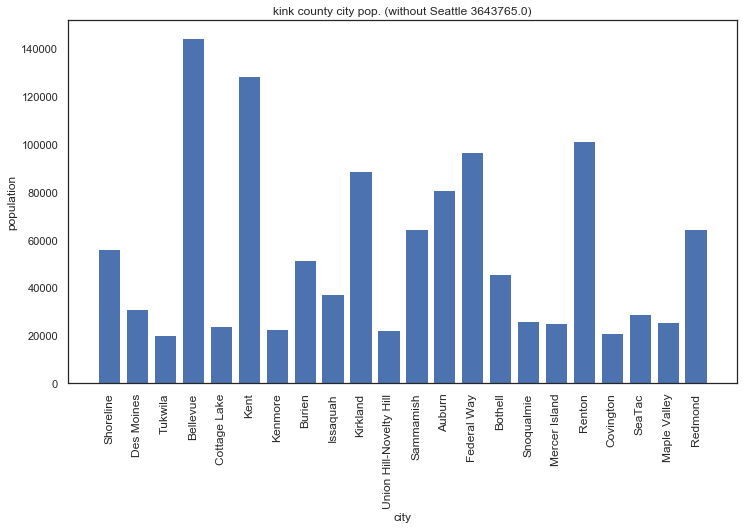

(22, 19)

In [198]:
c = us_cities[(us_cities.state_id == 'WA') & (us_cities.county_name == 'King')]
cns = c[(c.city != 'Seattle') & (c.population > 20000)]
plt.figure(figsize=(12,8))
plt.bar(cns.city,cns.population)
plt.xticks(cns.city, rotation='vertical', size=12)
plt.xlabel('city')
plt.ylabel('population')
plt.title(f'kink county city pop. (without Seattle {c.population.max()})')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('./pic_exports/CitySelect_Population_no_Seattle', dpi=300)
plt.show()
cns.shape

In [199]:
Selcted_cities = c[(c.population > 20000)]
Selcted_cities.shape
Selcted_cities.to_csv('data/King_county_city_data.csv')

### Load House price data and correlate to selected citys

In [200]:
df_raw = pd.read_csv('data/King_County_House_prices_dataset.csv')
city_data =  pd.read_csv('data/King_county_city_data.csv')

(-122.5658139784946, -121.6541860215054, 47.1223143598234, 47.814585640176595)

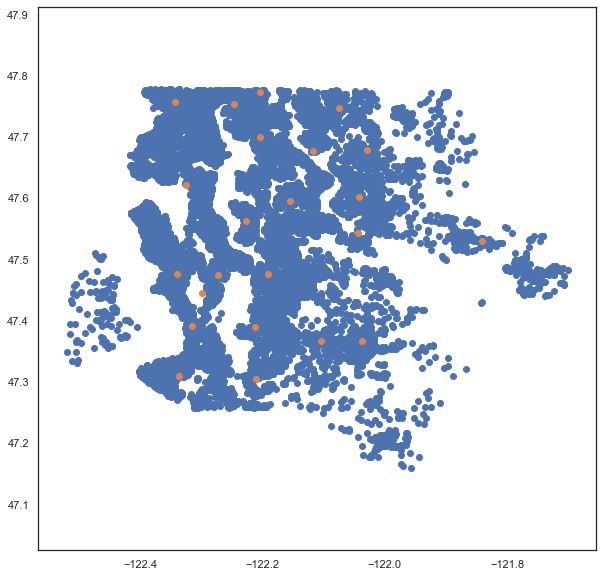

In [201]:
plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='lng',y='lat',data=city_data)

plt.axis('equal')

#### Get distance to city 

In [202]:
# add coordinats as tuple
df_raw['coord'] = list(zip(df_raw.lat, df_raw.long))
city_data['coord'] = list(zip(city_data.lat, city_data.lng))
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)"
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)"
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)"
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"


In [203]:
# this takes a little time !!!
import geopy.distance
def distto(c1, c2):
    return geopy.distance.vincenty(c1, c2).km

for cn in city_data['city']:
    city_coord = city_data[city_data.city == cn].coord
    df_raw[cn] = pd.Series(df_raw.coord.apply(lambda x: distto(x,city_coord)))

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  This is separate from the ipykernel package so we can avoid doing imports until


(-122.5658139784946, -121.6541860215054, 47.1223143598234, 47.814585640176595)

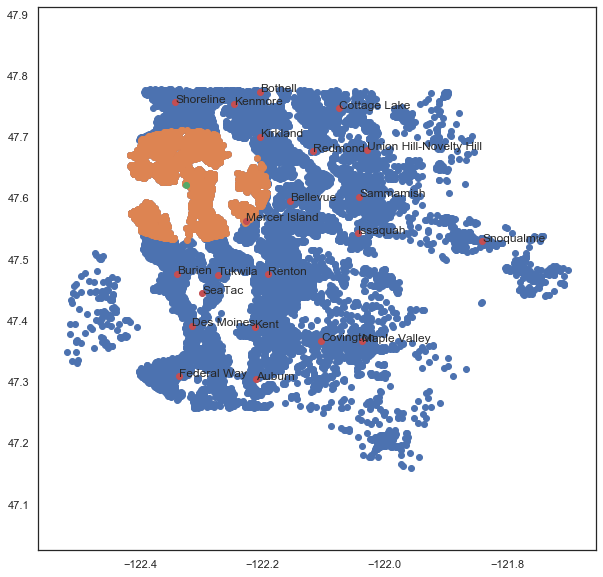

In [204]:
# Verify coordinates
city = 'Seattle'
plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='long',y='lat',data=df_raw[df_raw[city] < 10])
plt.scatter(x='lng',y='lat',data=city_data[city_data.city == city])
d = city_data[city_data.city != city]
plt.scatter(x='lng',y='lat',data=d[d.city != city])
for c,lat,lng in zip(d.city,d.lat,d.lng):
    plt.text(lng,lat,c, fontsize=12)
plt.axis('equal')

### Unit column adding for EU units m^2

In [205]:
Unit_sqf2sqm = 0.092903
Soccerfield = 68*105

In [206]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'coord', 'Shoreline',
       'Des Moines', 'Seattle', 'Tukwila', 'Bellevue', 'Cottage Lake', 'Kent',
       'Kenmore', 'Burien', 'Issaquah', 'Kirkland', 'Union Hill-Novelty Hill',
       'Sammamish', 'Auburn', 'Federal Way', 'Bothell', 'Snoqualmie',
       'Mercer Island', 'Renton', 'Covington', 'SeaTac', 'Maple Valley',
       'Redmond'],
      dtype='object')

In [207]:
df_raw['sqm_living'] =  df_raw.sqft_living * Unit_sqf2sqm
df_raw['sqm_lot'] =  df_raw.sqft_lot * Unit_sqf2sqm
df_raw['sqm_lot_soccer'] =  (df_raw.sqft_lot * Unit_sqf2sqm)/Soccerfield
df_raw['sqm_above'] =  df_raw.sqft_above * Unit_sqf2sqm
df_raw['sqm_living15'] =  df_raw.sqft_living15 * Unit_sqf2sqm
df_raw['sqm_lot15'] =  df_raw.sqft_lot15 * Unit_sqf2sqm

### Adding a price in million and thousend doller

In [208]:
df_raw['Mprice'] = df_raw.price/1e6
df_raw['kprice'] = df_raw.price/1e3

## clean is_renovated to long time nothing done

In [209]:
df_raw.yr_renovated.isnull().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [210]:
df_raw.yr_renovated[df_raw.yr_renovated.isnull()] = 0
df_raw.yr_renovated.isnull().value_counts()

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False    21597
Name: yr_renovated, dtype: int64

In [223]:
# now - year renovated*is renovated - year build
# 
def RenoAge(built,Reno):
    Now = 2015
    if Reno==0.:
        RenoAge = Now-built
    else:
        RenoAge = Now-Reno
    return RenoAge

df_raw['renovated'] = df_raw.yr_renovated!=0
df_raw['renovation_age'] = \
    df_raw.apply(lambda x: RenoAge(x.yr_built,x.yr_renovated), axis= 1)

df_raw[['renovation_age','renovated','yr_built','yr_renovated']].head()

,renovation_age,renovated,yr_built,yr_renovated
0,60.0,False,1955,0.0
1,24.0,True,1951,1991.0
2,82.0,False,1933,0.0
3,50.0,False,1965,0.0
4,28.0,False,1987,0.0


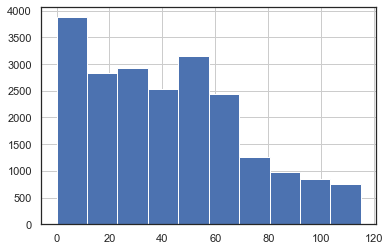

In [220]:
df_raw['renovation_age'].hist()

In [ ]:
df_raw

### Overall Season of Sales split date of sale 

In [224]:
import re
temp = df_raw['date']
temp = temp.apply(lambda x: int(re.findall('\d+',x)[0]))
df_raw['sale_month'] = temp

In [225]:
import re
temp = df_raw['date']
temp = temp.apply(lambda x: int(re.findall('\d+',x)[2]))
df_raw['sale_year'] = temp
df_raw.sale_year.unique() 
# sales dates are from 2014-2015

array([2014, 2015])

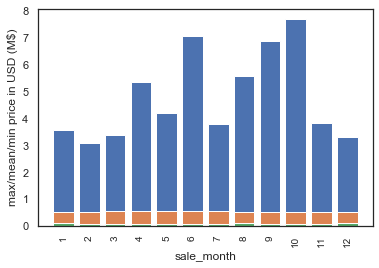

In [226]:
def plotMaxMeanMin(df_p,key,safeto=None):
    keys = [zipcode for zipcode, df in df_p.groupby(['sale_month'])]
    keys = [str(z) for z in keys]
    plt.bar(keys,df_p.groupby([key]).max()['Mprice'])
    plt.bar(keys,df_p.groupby([key]).mean()['Mprice'])
    plt.bar(keys,df_p.groupby([key]).min()['Mprice'])
    plt.ylabel('max/mean/min price in USD (M$)')
    plt.xlabel(key)
    plt.xticks(keys, rotation='vertical', size=10)
    if safeto:
        plt.savefig(safeto, dpi=300)
    plt.show()
    
plotMaxMeanMin(df_raw,'sale_month','./pic_exports/Sale_Season_Overall_1')

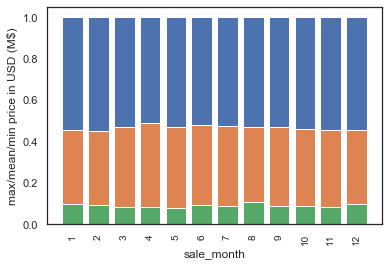

In [227]:
plotMaxMeanMin(df_raw[df_raw.Mprice < 1],'sale_month','./pic_exports/Sale_Season_Overall_2')

### Selecting the rigion

- needed space at least 12000 m^2 for lot
- price limit somwehre ... 

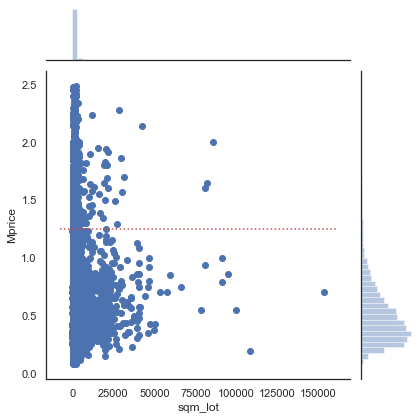

In [228]:
# price limit reasonabel 
g = sns.jointplot(x='sqm_lot',y='Mprice',data=df_raw[df_raw.price < 2.5e6],kind='scatter')
# good box is bellow 

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
price_limit = 1.25
g.ax_joint.plot([x0,x1], [price_limit,price_limit], ':r')
plt.savefig('./pic_exports/ReasonablePrice', dpi=300)

In [229]:
df_raw.sqm_lot.max()

153416.205177

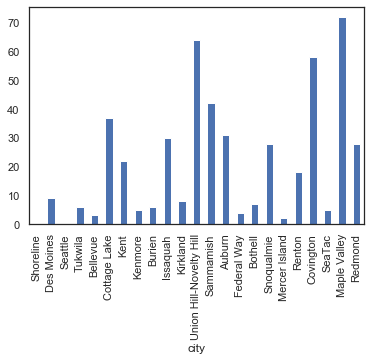

In [230]:
# TODO fill the rest of basic stats
lot_thres = 12000

df_stat = pd.DataFrame(columns=['hits','population','low_price','low_price_lot','mean_lot'], index=city_data.city)
for city in city_data.city:
    df = df_raw[(df_raw[city] < 10) & 
                (df_raw[city] > 2) & 
                (df_raw['sqm_lot'] > lot_thres) & 
                (df_raw['Mprice'] < price_limit)]

    df_stat.at[city,'hits'] = df.shape[0]
    df_stat.at[city,'low_price'] = df.price.min()
    df_stat.at[city,'low_price_lot'] = df[df.price == df.price.min()].sqft_lot.max()
    #print(city)
    a = city_data[city_data.city.str.contains(city)].population.max()
    df_stat.at[city,'population'] = a
    
df_stat.hits.plot.bar()

In [ ]:
### find metric to mage city choice based on availbilty and proximity 

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


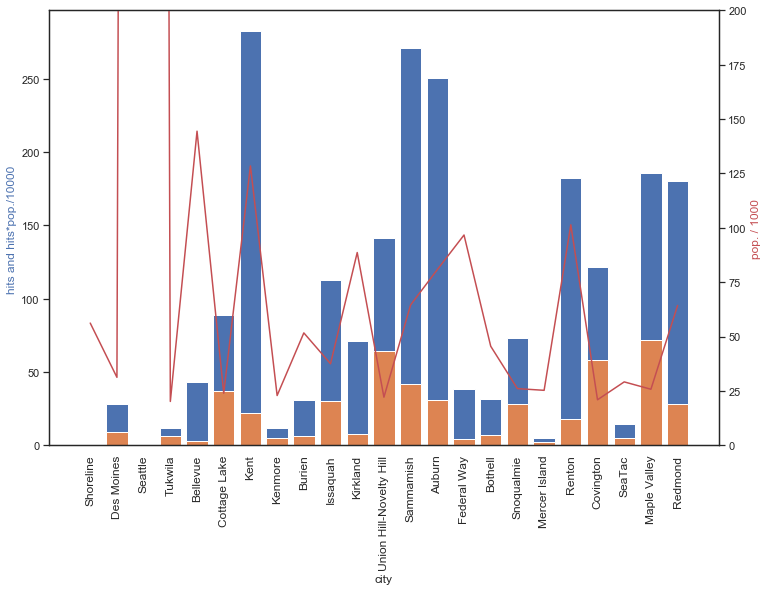

In [231]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
keys = df_stat.index
ax2.plot(keys,df_stat.population/1000,'r')
ax1.bar(keys,df_stat.hits*df_stat.population/10000)
ax1.bar(keys,df_stat.hits*1)
ax1.set_xlabel('city')
ax2.set_ylabel('pop. / 1000', color='r')
ax2.set_ylim([0,200])
ax1.set_ylabel('hits and hits*pop./10000 ', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=12)
plt.savefig('./pic_exports/CitySelect_Pass2ByHitsWithMetric', dpi=300)
fig.show()

### we continue with top 3 citys Kent,Sammamish, Auburn

In [232]:
city=['Auburn','Kent', 'Sammamish', 'Maple Valley', 'Renton'] 
df_select = df_raw[(((df_raw[city[0]] < 10) & (df_raw[city[0]] > 1)) | 
             ((df_raw[city[1]] < 10) & (df_raw[city[1]] > 1)) |
             ((df_raw[city[4]] < 10) & (df_raw[city[4]] > 1)) |
             ((df_raw[city[2]] < 10) & (df_raw[city[2]] > 1)) |
             ((df_raw[city[3]] < 10) & (df_raw[city[3]] > 1)) ) & 
                (df_raw['sqm_lot'] > lot_thres) & 
                (df_raw['Mprice'] < price_limit)]

df_all_range = df_raw[(((df_raw[city[0]] < 10) & (df_raw[city[0]] > 1)) | 
             ((df_raw[city[1]] < 10) & (df_raw[city[1]] > 1)) |
             ((df_raw[city[4]] < 10) & (df_raw[city[4]] > 1)) |
             ((df_raw[city[2]] < 10) & (df_raw[city[2]] > 1)) |
             ((df_raw[city[3]] < 10) & (df_raw[city[3]] > 1)) )  ]

print(df_select.shape)
print(df_all_range.shape)

(151, 57)
(8724, 57)


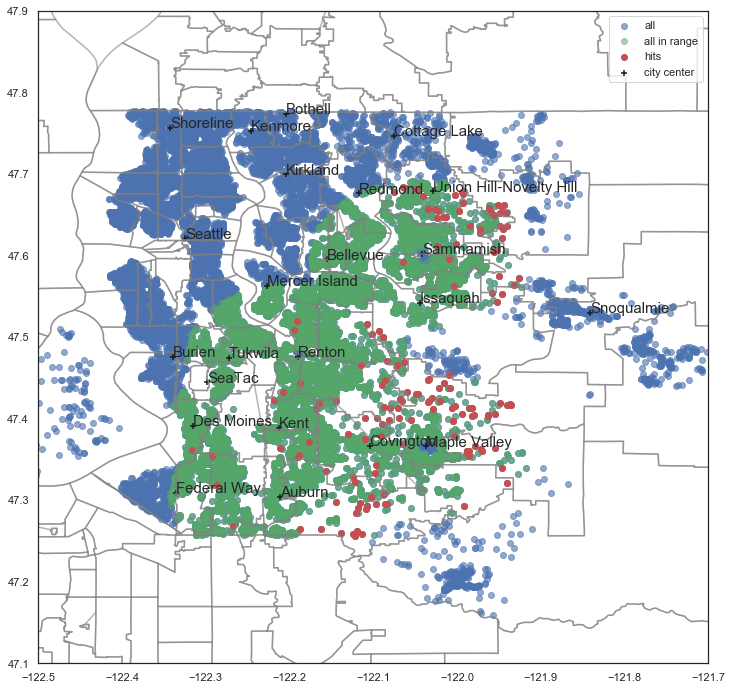

In [163]:
## show selected postion

import shapefile as shp  # Requires the pyshp package
sf = shp.Reader("./data/Zipcodes_for_King_County_and_Surrounding_Area__zipcode_area.shp")

plt.figure(figsize=(12,12))
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,'gray', alpha=0.6)
    

plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7],label= 'all', alpha=0.6)
plt.scatter(x='long',y='lat',data=df_all_range, label='all in range', alpha=0.5, color='g')
plt.scatter(x='long',y='lat',data=df_select, label='hits', color='r')
d = city_data
plt.scatter(x='lng',y='lat',data=d ,marker='+', label='city center', color='k')
for c,lat,lng in zip(d.city,d.lat,d.lng):
    plt.text(lng,lat,c, fontsize=15)
plt.legend()
#plt.axis('equal')
plt.ylim(47.1,47.1+0.8)
plt.xlim(-122.5,-122.5+0.8)

plt.savefig('./pic_exports/CitySelect_Map', dpi=300)

### check the price season

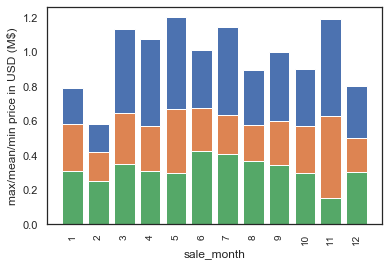

In [233]:
### give feedback about the porp. of finding places 

plotMaxMeanMin(df_select[df_select.Mprice < 2],'sale_month','./pic_exports/CitySelectedSale_Season_Overall_2')

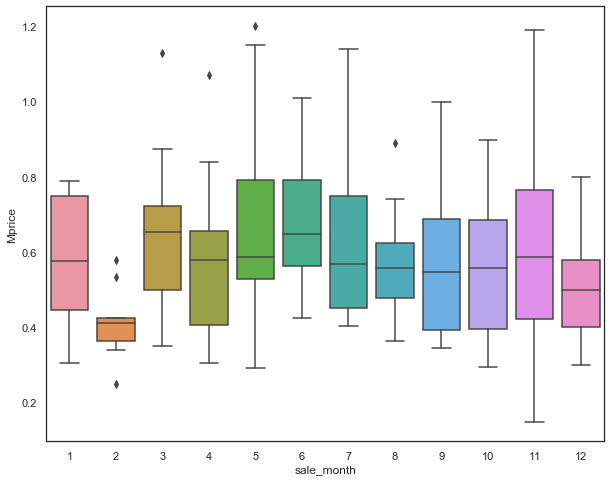

In [234]:
plt.figure(figsize=(10,8))
sns.boxplot(x="sale_month", y="Mprice", data=df_select)
plt.savefig('./pic_exports/CitySelect_sales_month_box', dpi=300)

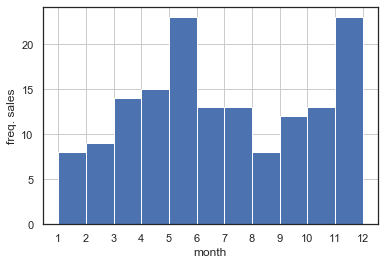

In [235]:
# TODO add better plot
df_select.sale_month.hist(bins=range(1,13))
plt.xticks(range(1,13))
plt.xlabel('month')
plt.ylabel('freq. sales')
plt.savefig('./pic_exports/CitySelect_sales_month_hist', dpi=300)

In [247]:
df_hit_chances = pd.DataFrame()
i = pd.Index(['all', 'selected', 'all_in_range'])
df_hit_chances['hits'] = pd.Series([df_raw.shape[0],df_select.shape[0],df_all_range.shape[0]],
                    index=i)

df_hit_chances['prop total'] = pd.Series([df_raw.shape[0]/df_raw.shape[0],df_select.shape[0]/df_raw.shape[0],df_all_range.shape[0]/df_raw.shape[0]],
                    index=i)

df_hit_chances['prop range'] = pd.Series([df_raw.shape[0]/df_all_range.shape[0],df_select.shape[0]/df_all_range.shape[0],df_all_range.shape[0]/df_all_range.shape[0]],
                    index=i)

#sns.heatmap(df_hit_chances)
df_hit_chances

,hits,prop total,prop range
all,21597,1.000000,2.475585
selected,151,0.006992,0.017309
all_in_range,8724,0.403945,1.000000


In [248]:
# TODO - calc chances make table
# add all in price range 
# all in size range
chances

all count             21597
selected count          151
all in range count     8724
dtype: int64

### Find Price Indecators of houses

In [250]:
df_select.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'coord', 'Shoreline',
       'Des Moines', 'Seattle', 'Tukwila', 'Bellevue', 'Cottage Lake', 'Kent',
       'Kenmore', 'Burien', 'Issaquah', 'Kirkland', 'Union Hill-Novelty Hill',
       'Sammamish', 'Auburn', 'Federal Way', 'Bothell', 'Snoqualmie',
       'Mercer Island', 'Renton', 'Covington', 'SeaTac', 'Maple Valley',
       'Redmond', 'sqm_living', 'sqm_lot', 'sqm_lot_soccer', 'sqm_above',
       'sqm_living15', 'sqm_lot15', 'Mprice', 'kprice', 'renovated',
       'renovation_age', 'sale_month', 'sale_year'],
      dtype='object')

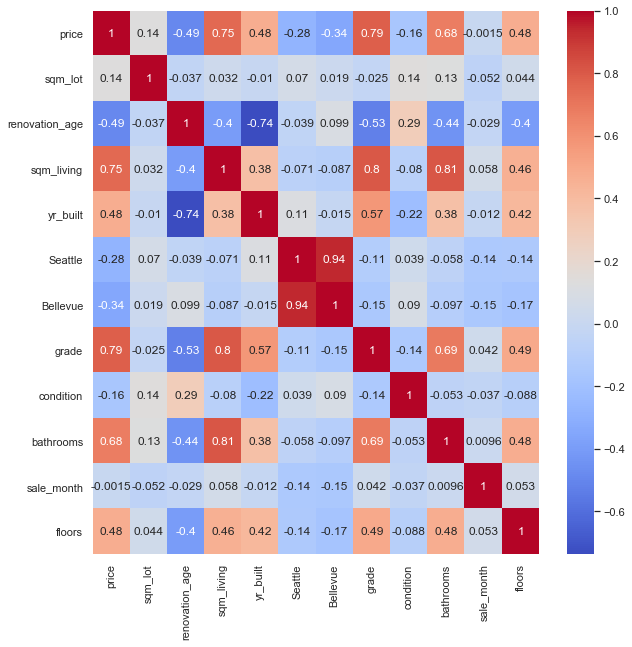

In [253]:
l_focus = ['price',
           'sqm_lot',
           'renovation_age',
           'sqm_living',
           'yr_built',
           'Seattle',
           'Bellevue',
           'grade',
           'condition',
           'bathrooms',
           'sale_month',
           'floors']

plt.figure(figsize=(10,10))
sns.heatmap(df_select[l_focus].corr(),cmap='coolwarm',annot=True)

# all chosen seem to have a impact expet sale_month...

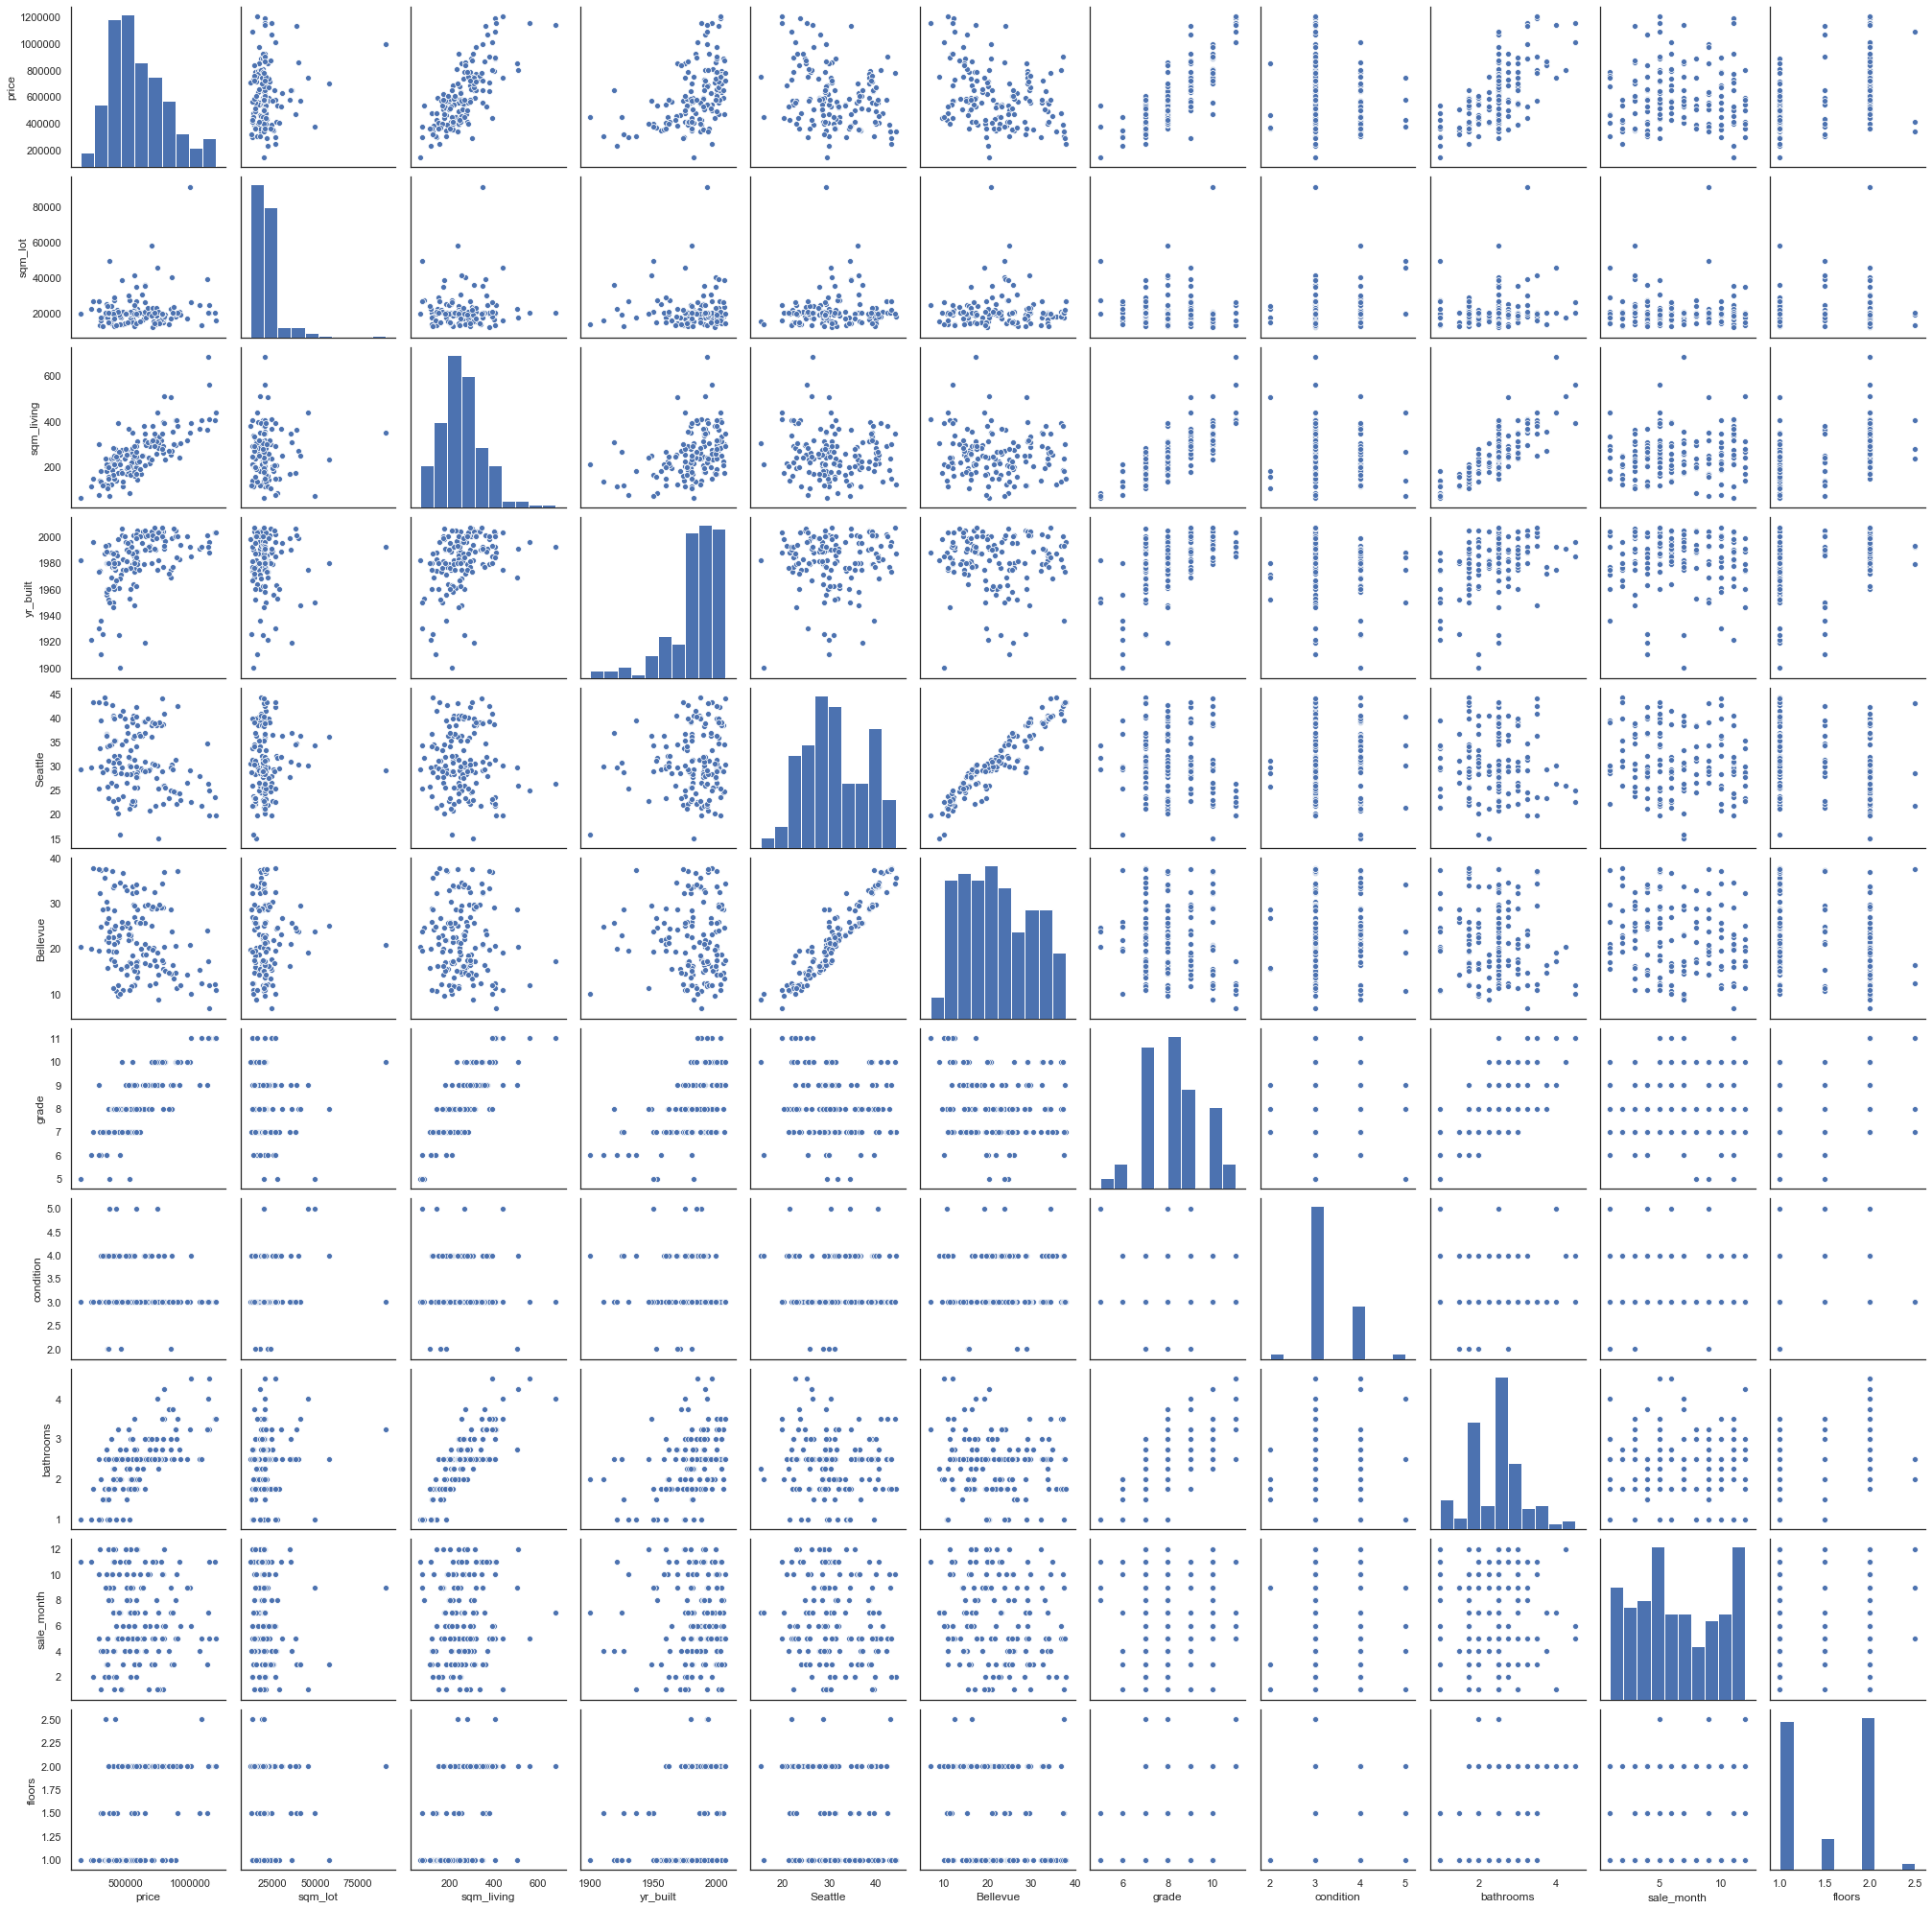

In [179]:
sns.pairplot(df_select[l_focus])

In [408]:
# try to scale the price log
df_select['priceLog'] = np.log(df_select.price)
l_focus[0] = 'priceLog'

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [409]:
l_focus[0] = 'price'
l_focus.append('Kent')

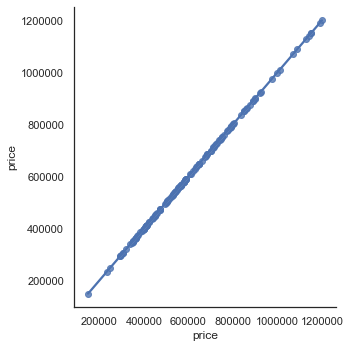

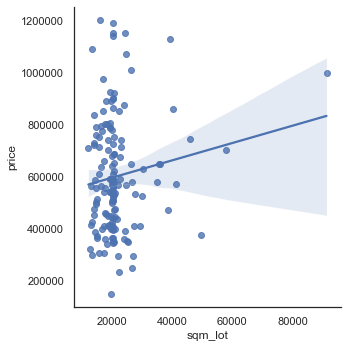

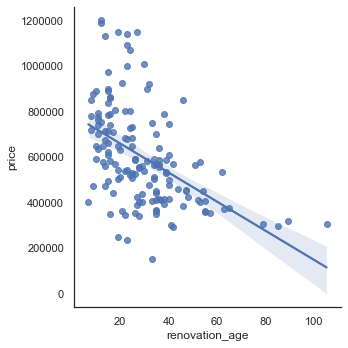

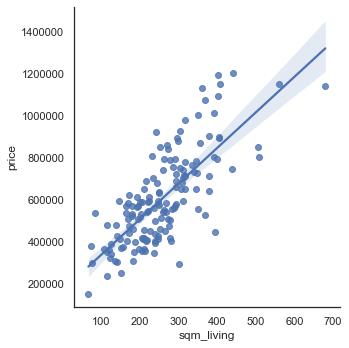

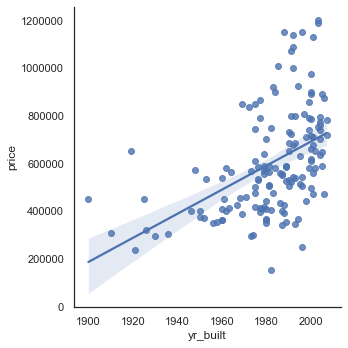

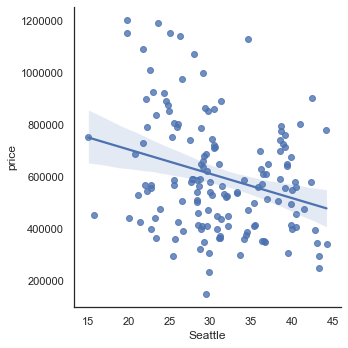

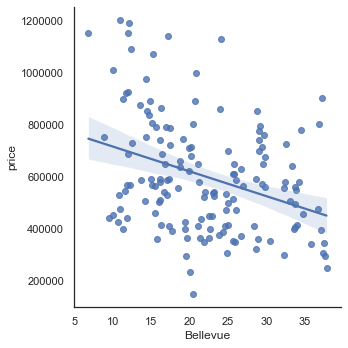

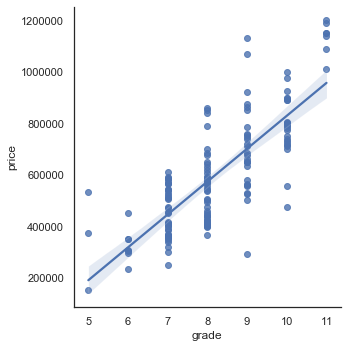

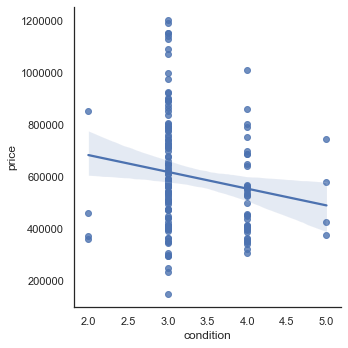

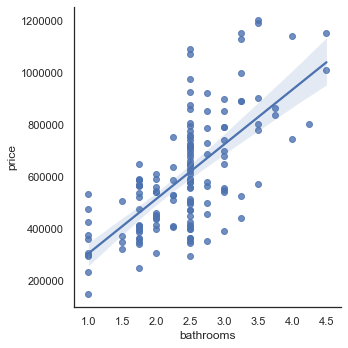

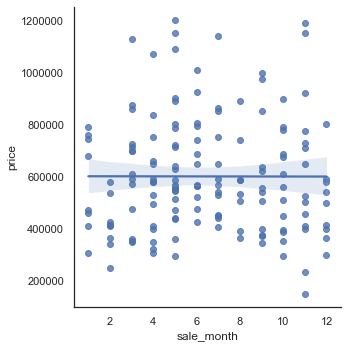

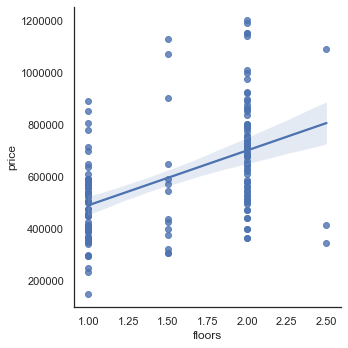

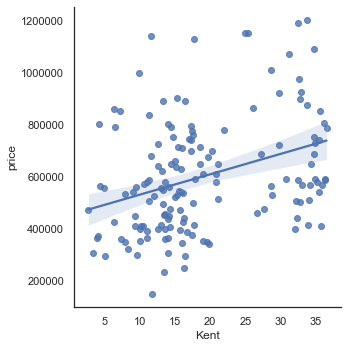

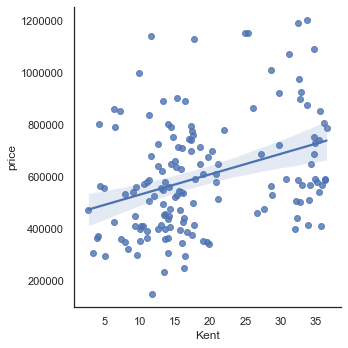

In [416]:
for e in l_focus:
    sns.lmplot(y=l_focus[0],x=e,data=df_select)
    plt.savefig('./pic_exports/Scatter_%s' %e, dpi=300)
    

In [ ]:
# primary correlation
# sqm_living
# bathrooms
# grade ( can be kepts as is)
# renovation_age


# mini impact distance to the biggest citys
# just take Seattle


# special attention
# sqm_lot does not drive the price - TODO make plot for presentaion
# as expected sale month

# catecoricals 
#floors

#condtion
#(grade)

## build a OLS model - Tunning 

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

#https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [411]:
# define the variables
y = df_select['price']
#y = df_select['priceLog']
#X = df_select[['sqm_living','Seattle']]
#X = df_select[['sqm_living','bathrooms', 
#               'Seattle', 'grade', 'renovation_age' ]]

X = df_select[['sqm_living','bathrooms', 'yr_built',
         'Seattle', 'grade', 'renovation_age' , 'Auburn','Kent', 'Sammamish', 'Maple Valley', 'Renton' ]]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=101)

In [412]:
# fit a model
lm = LinearRegression()
lm.fit(X_train,y_train)
#lm = sm.OLS(y_train ,X_train).fit()
y_hat_t = lm.predict( X_train)

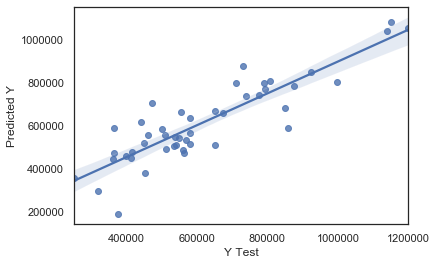

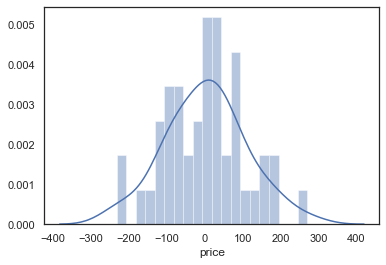

In [413]:
y_hat = lm.predict( X_test)
sns.regplot(y_test,y_hat)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()
sns.distplot((y_test-y_hat)/1000,bins=20);
plt.show()

In [414]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
sqm_living,352.029476
bathrooms,50056.372677
yr_built,1153.189209
Seattle,-10436.533025
grade,68474.900118
renovation_age,-280.568327
Auburn,-949.823880
Kent,3700.696389
Sammamish,-908.840011
Maple Valley,-3813.471592


In [415]:
def dir_exp(x):
    if x>0:
        return 'increase increases price'
    else:
        return 'increase reduces price'
coeffexp = coeffecients.Coeffecient.apply(lambda x: dir_exp(x))
coeffexp

sqm_living        increase increases price
bathrooms         increase increases price
yr_built          increase increases price
Seattle             increase reduces price
grade             increase increases price
renovation_age      increase reduces price
Auburn              increase reduces price
Kent              increase increases price
Sammamish           increase reduces price
Maple Valley        increase reduces price
Renton            increase increases price
Name: Coeffecient, dtype: object

In [397]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              244.6
Date:                Thu, 05 Mar 2020   Prob (F-statistic):                    4.83e-64
Time:                        20:20:24   Log-Likelihood:                         -1373.1
No. Observations:                 105   AIC:                                      2768.
Df Residuals:                      94   BIC:                                      2797.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqm_living       351.8278    318.367      1.105      0.272    -280.297     983.953
bathrooms       4.711e+04   3.03e+04      1.557      0.123    -1.3e+04    1.07e+05
yr_built          46.9049    165.736      0.283      0.778    -282.168     375.978
Seattle        -1.025e+04    1.1e+04     -0.929      0.355   -3.22e+04    1.17e+04
grade            7.32e+04   1.83e+04      4.008      0.000    3.69e+04    1.09e+05
renovation_age -1044.1585    986.253     -1.059      0.292   -3002.387     914.070
Auburn         -1436.2111   8936.986     -0.161      0.873   -1.92e+04    1.63e+04
Kent            5167.2230    1.4e+04      0.370      0.712   -2.25e+04    3.29e+04
Sammamish       -728.8773   6440.476     -0.113      0.910   -1.35e+04    1.21e+04
Maple Valley   -4008.3960   5223.654     -0.767      0.445   -1.44e+04    6363.292
Renton          3465.8480   1.22e+04      0.285      0.776   -2.07e+04    2.76e+04
==============================================================================
Omnibus:                        9.212   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               13.886
Skew:                           0.376   Prob(JB):                     0.000966
Kurtosis:                       4.615   Cond. No.                     5.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [360]:
ModelMetric = pd.DataFrame(columns=['Model Metric', 'Data Stat'])
ModelMetric.at['MAE($)','Model Metric'] = (metrics.mean_absolute_error(y_test, y_hat))
ModelMetric.at['MPE(%)','Model Metric'] = mean_absolute_percentage_error(y_test, (y_hat))
ModelMetric.at['MSE','Model Metric'] = metrics.mean_squared_error(y_test, y_hat)
ModelMetric.at['RMSE','Model Metric'] = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
ModelMetric.at['R2','Model Metric'] = metrics.r2_score(y_test, y_hat)
ModelMetric.at['R2train','Model Metric'] = metrics.r2_score(y_train, y_hat_t)
ModelMetric.at['abs. MEAfMean','Model Metric'] = y_train.mean()*mean_absolute_percentage_error(y_test, y_hat)/100
ModelMetric.at['abs. MEAfMax','Model Metric'] = y_train.max()*mean_absolute_percentage_error(y_test, y_hat)/100
ModelMetric.at['abs. MEAfMean','Data Stat'] = (y_train.mean())
ModelMetric.at['abs. MEAfMax','Data Stat'] = (y_train.max())
ModelMetric

,Model Metric,Data Stat
MAE($),83544.8,NaN
MPE(%),15.61,NaN
MSE,1.21256e+10,NaN
RMSE,110116,NaN
R2,0.756568,NaN
R2train,0.694,NaN
abs. MEAfMean,92395.9,591902
abs. MEAfMax,185759,1.19e+06


In [295]:
print(np.exp(y_train.mean())*metrics.mean_absolute_error(y_test, y_hat))
print(np.exp(y_train.mean())*metrics.mean_absolute_error(y_train, y_hat_t))

81404.34236209963
85071.7419907982


## Try to Improve prediction

In [399]:
 def Train(xlist,y,df):   
    y = df[y]
    X = df[xlist]
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=101)
    #lm = LinearRegression()
    lm = sm.OLS(y_train ,X_train).fit()
    #lm.fit(X_train,y_train)
    y_hat = lm.predict( X_test)
    y_hat_t = lm.predict( X_train)

    return mean_absolute_percentage_error(y_test, y_hat)

y = 'price'
xlist = ['sqm_living']
print(xlist ,Train(xlist,y,df_select))

y = 'price'
xlist = ['sqm_living', 'renovation_age']
print(xlist ,Train(xlist,y,df_select))


y = 'price'
xlist = ['sqm_living','bathrooms']
print(xlist ,Train(xlist,y,df_select))

y = 'price'
xlist = ['sqm_living','grade','Seattle']
print(xlist ,Train(xlist,y,df_select))


y = 'price'
xlist = ['grade','sqm_living','Seattle','renovation_age']
print(xlist ,Train(xlist,y,df_select))


y = 'price'
xlist = ['sqm_living','bathrooms', 
         'Seattle', 'grade', 'renovation_age'  ]
print(xlist ,Train(xlist,y,df_select))

y = 'price'
xlist = ['sqm_living','bathrooms', 
         'Seattle', 'grade', 'renovation_age' ,'Bellevue' ]
print(xlist ,Train(xlist,y,df_select))

y = 'price'
xlist = ['sqm_living','bathrooms', 
         'Seattle', 'grade', 'yr_built' , 'renovation_age' ,'Bellevue', 'Auburn','Kent', 'Sammamish', 'Maple Valley', 'Renton' ]
print(xlist ,Train(xlist,y,df_select))




['sqm_living'] 19.59
['sqm_living', 'renovation_age'] 19.4
['sqm_living', 'bathrooms'] 17.66
['sqm_living', 'grade', 'Seattle'] 15.54
['grade', 'sqm_living', 'Seattle', 'renovation_age'] 15.32
['sqm_living', 'bathrooms', 'Seattle', 'grade', 'renovation_age'] 15.77
['sqm_living', 'bathrooms', 'Seattle', 'grade', 'renovation_age', 'Bellevue'] 15.12
['sqm_living', 'bathrooms', 'Seattle', 'grade', 'yr_built', 'renovation_age', 'Bellevue', 'Auburn', 'Kent', 'Sammamish', 'Maple Valley', 'Renton'] 14.13


In [ ]:
living space of the house, number of bathrooms, year of build, years since last renovation, the Kink County Housing Grade, Distance to some Cities inc. Seattle 


In [407]:
df_raw.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])